In [5]:
import pandas as pd

In [7]:
# Carga inicial del dataset
ruta_archivo = 'winequality-red.csv'
data = pd.read_csv(ruta_archivo)
data.head()
# Muestra las primeras filas del dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
!pip install matplotlib seaborn

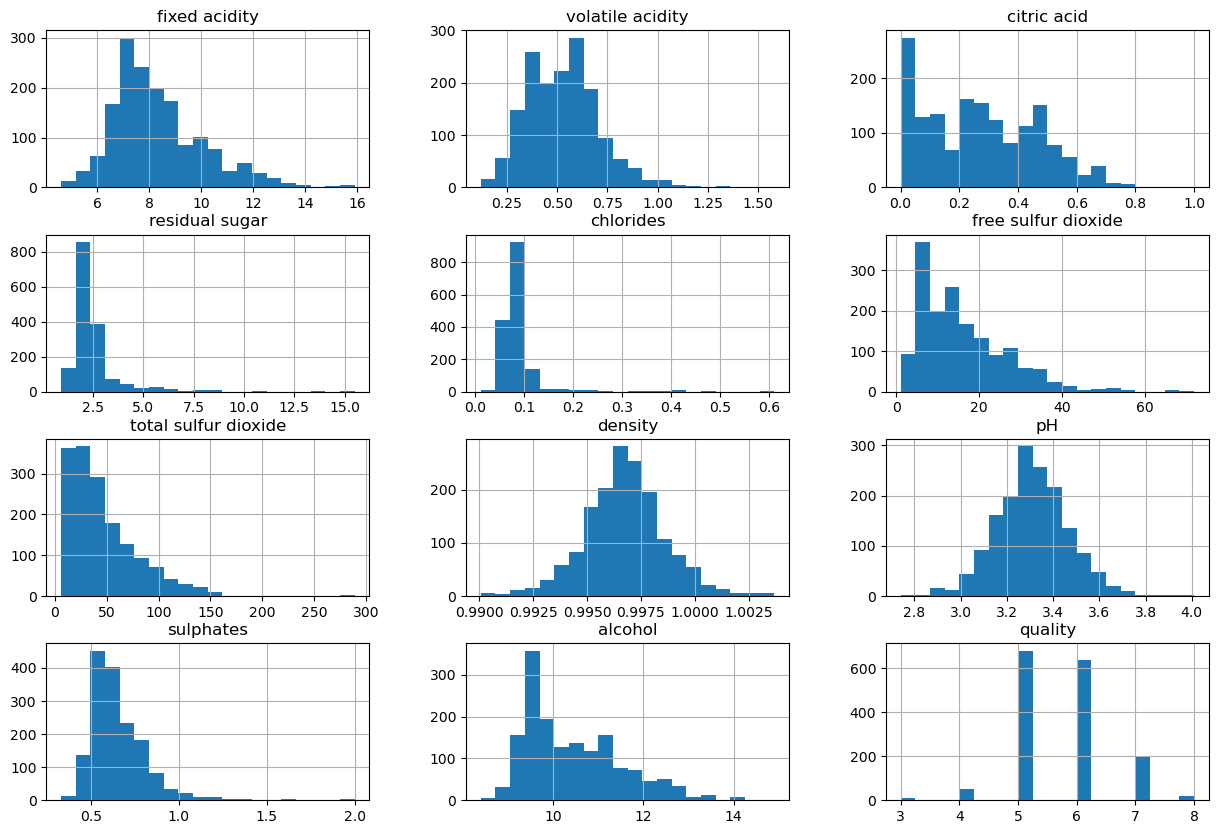

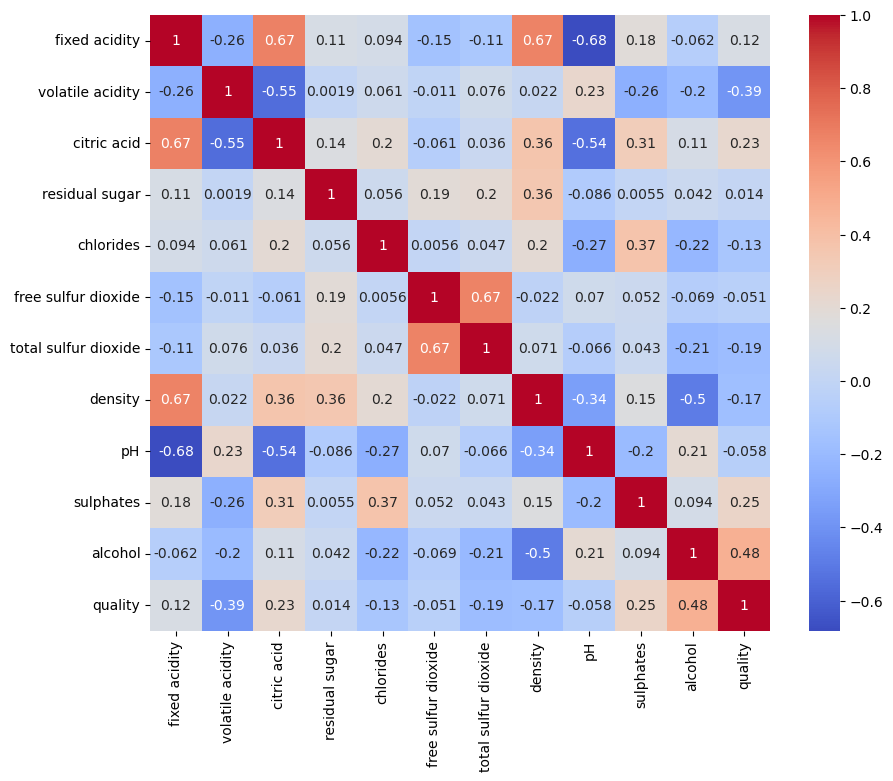

In [13]:
###### 1. Realizar un análisis exploratorio de los datos para identificar
# relaciones entre variables, valores atípicos, tendencias, etc. 

import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas para cada columna numérica
data.hist(bins=20, figsize=(15, 10))
plt.show()

# Mapa de calor para mostrar correlación entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

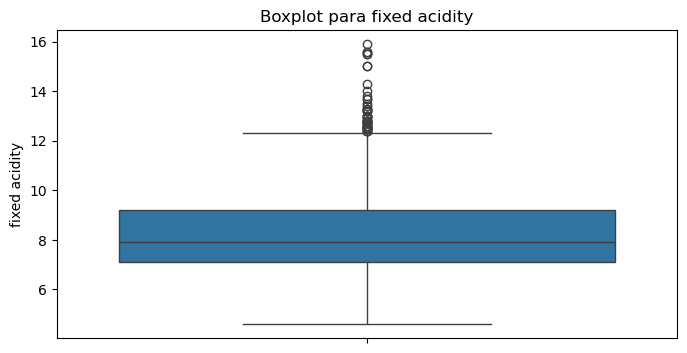

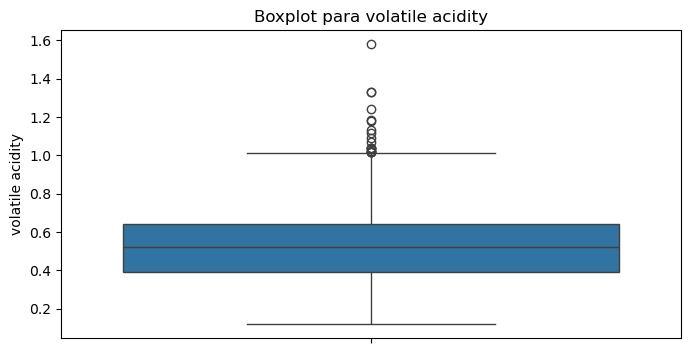

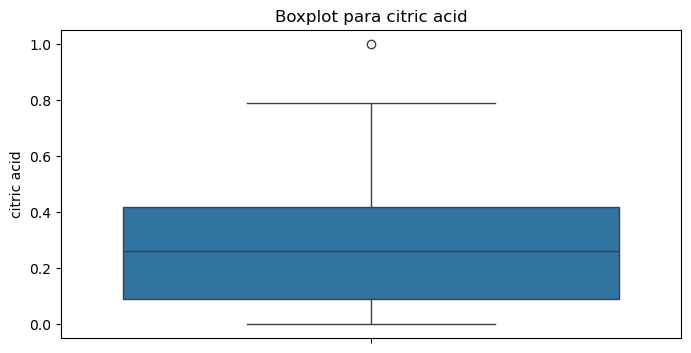

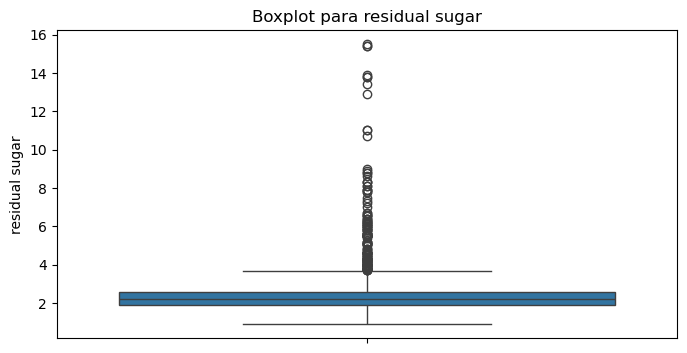

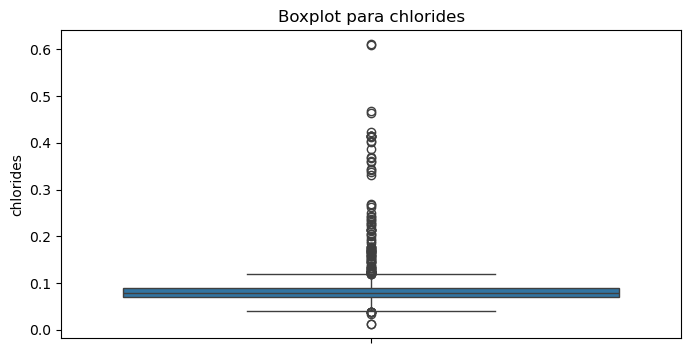

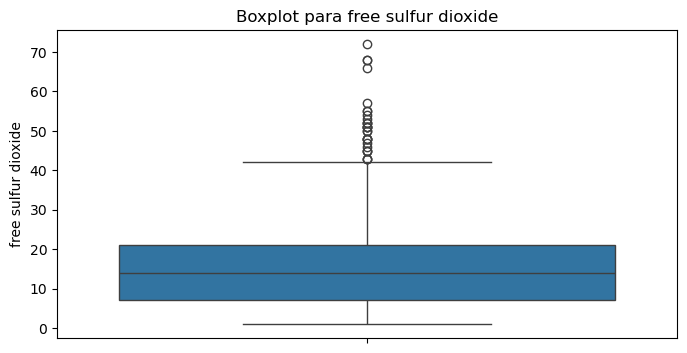

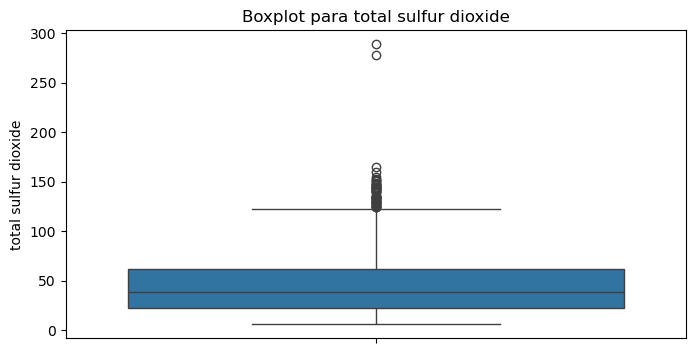

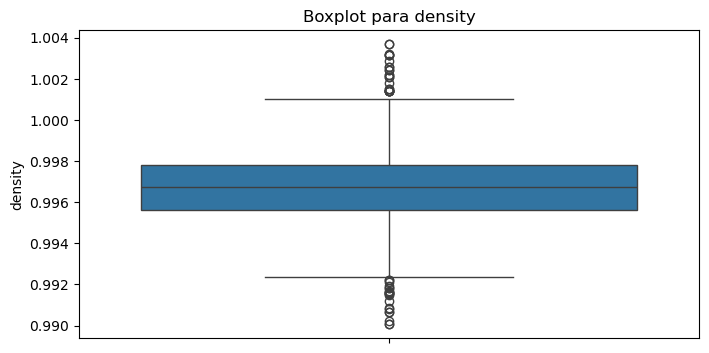

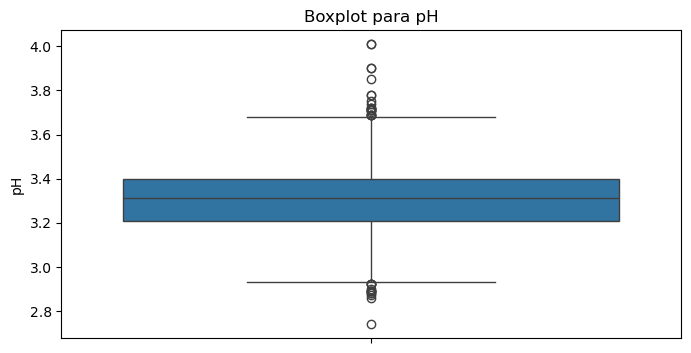

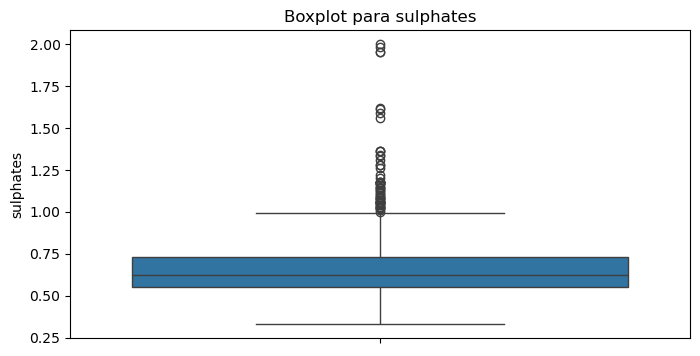

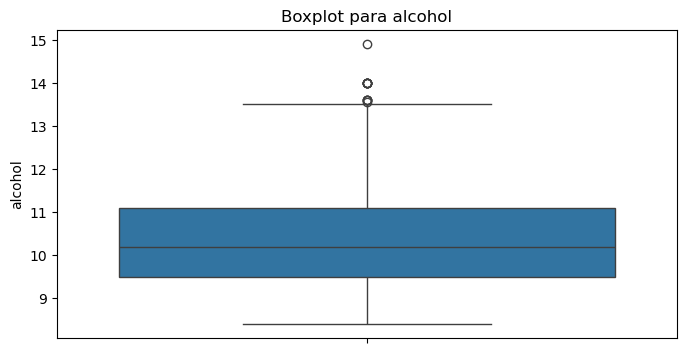

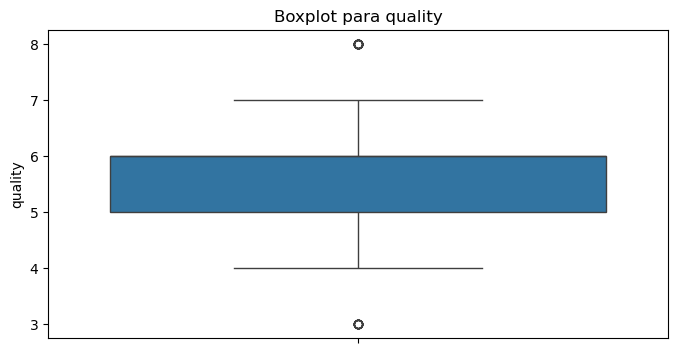

In [15]:
# Detección de Valores Atípicos
for columna in data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[columna])
    plt.title(f'Boxplot para {columna}')
    plt.show()

In [17]:
###### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y
# transformándolos según sea necesario. 

# Manejo de Valores Faltantes
# identificar valores nulos en el dataset

print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [21]:
# Rellenamos valores nulos con la media
data.fillna(data.mean(), inplace=True)


In [49]:
#  Estandarización
#  Estandarizaremos las variables numéricas para que tengan una media de 0 y una desviación estándar de 1.
# Excluiremos la columna quality, ya que esta será la variable objetivo.
# Se usará StandardScaler para escalar las variables numéricas y asegurar que todas estén en una escala similar.

from sklearn.preprocessing import StandardScaler

# Seleccionamos las variables con mejor correlacion para escalar
columnas_escalar = ['fixed acidity', 'volatile acidity','density', 
                    'pH', 'sulphates', 'alcohol']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columnas_escalar])

# Convertimos de nuevo a un DataFrame y añadimos la columna 'quality' sin escalar
data_scaled = pd.DataFrame(data_scaled, columns=columnas_escalar)
data_scaled['quality'] = data['quality'].values


In [51]:
###### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
# Con la selección de características vamos a identificar cuales son las variables más relevantes para el modelo
# Dividimos el dataset entre variables predictoras (X) y variable objetivo (y).
X = data_scaled.drop('quality', axis=1)
y = data_scaled['quality']

In [55]:
###### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
# Se usará un 70% para entrenamiento y un 30% para prueba.
# usamos train_test_split de sklearn.model_selection.

from sklearn.model_selection import train_test_split

# Dividimos los datos con un 70% para entrenamiento y un 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

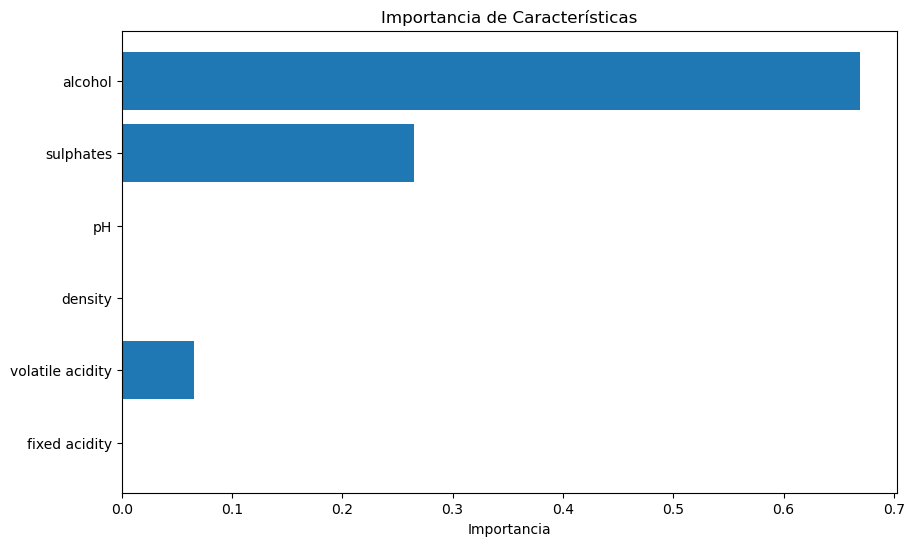

In [85]:
# 5. Entrenar el modelo configurando los diferentes hiperparámetros.
# Trabajamos con el dataset de train
# Usamos el modelo DecisionTreeClassifier para calcular la importancia de cada característica en la predicción de la calidad del vino.
modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(X_train, y_train)

# Visualizamos la importancia de cada característica
importances = modelo.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Importancia de Características')
plt.xlabel('Importancia')
plt.show()

# Gráfico que indica cuáles características contribuyen más a predecir la quality del vino.


              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        17
           5       0.63      0.75      0.69       195
           6       0.51      0.47      0.49       200
           7       0.40      0.38      0.39        61
           8       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.59      0.27      0.26       480
weighted avg       0.56      0.55      0.53       480

Precisión: 0.54375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.57      0.81      0.67       195
           6       0.53      0.44      0.48       200
           7       0.42      0.25      0.31        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   m

C:\Users\mosqu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mosqu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mosqu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


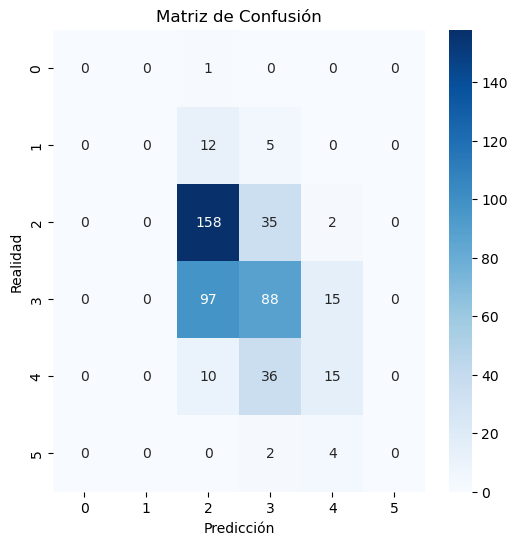

In [87]:
###### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score.
# Calculamos estas métricas usando classification_report de sklearn.metrics.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

print(classification_report(y_test, y_pred, zero_division=1))

# Hacemos predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calculamos la precisión, recall y F1-score
print("Precisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusión para visualizar el desempeño
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()


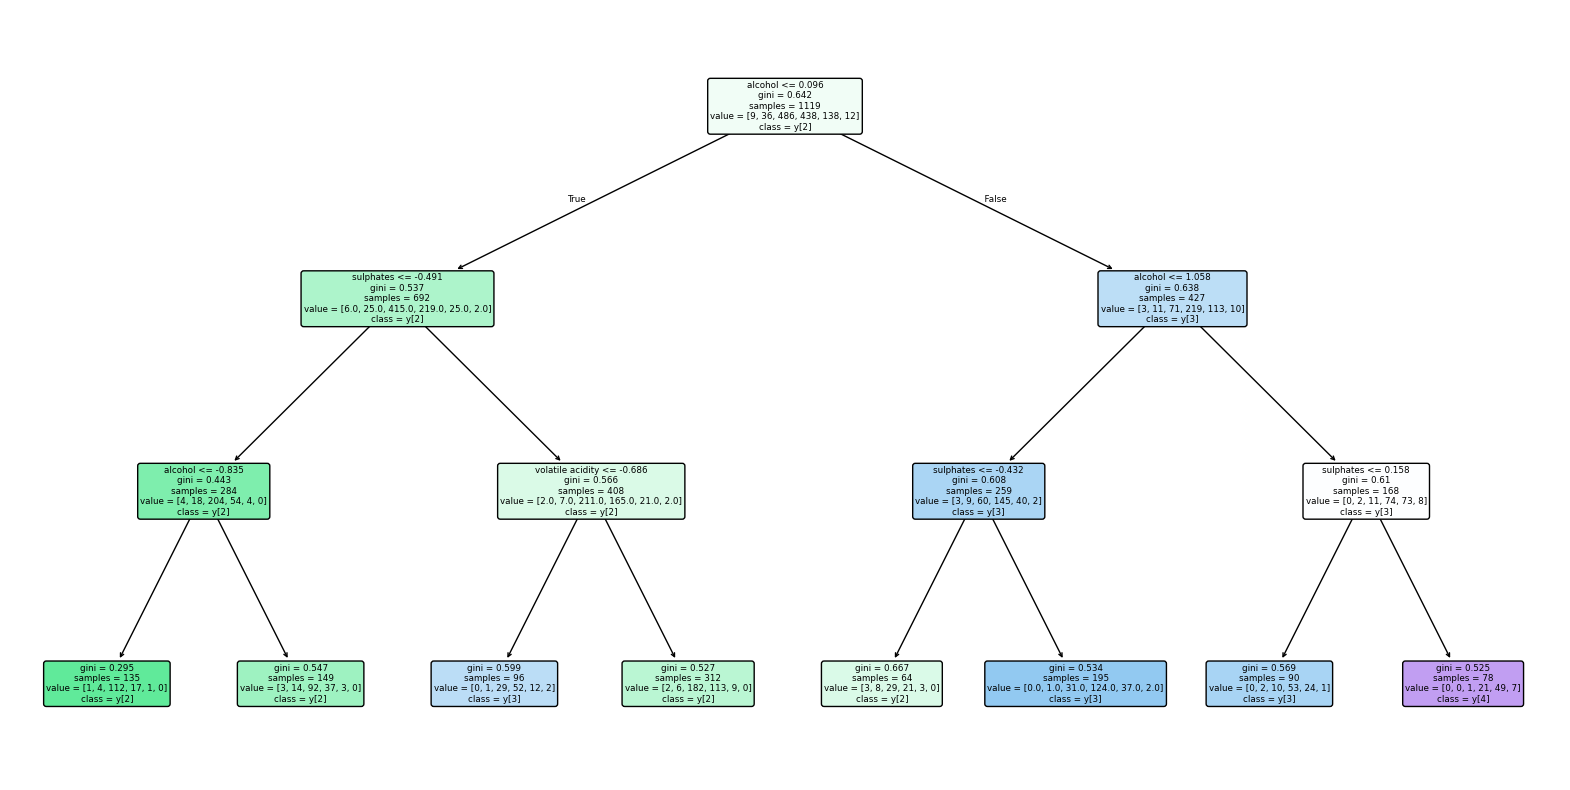

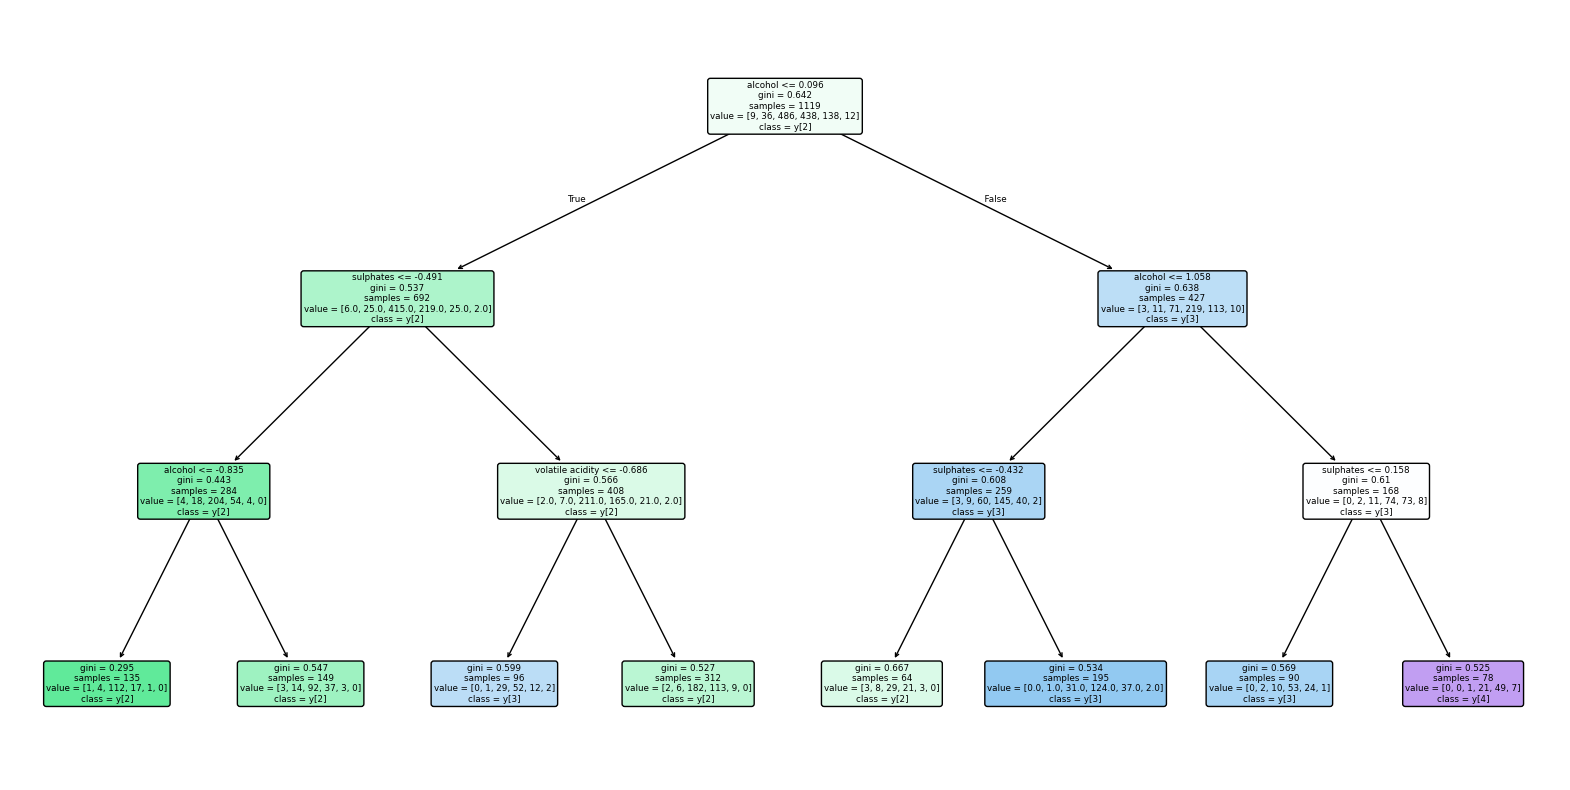

In [89]:
# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
# Visualización del árbol
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Configuración del tamaño de la figura
plt.figure(figsize=(20, 10))

# Visualización del árbol
plot_tree(modelo, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show()
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Configuración del tamaño de la figura
plt.figure(figsize=(20, 10))

# Visualización del árbol
plot_tree(modelo, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show() 



